In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import torch as t
plt.style.use('dark_background')
%load_ext autoreload
%autoreload 2

In [12]:
p1 = cv2.imread("/data_nfs/je30bery/angelolab_data/p1_labeledcellData.tiff")

In [13]:
p1.shape

(2048, 2048, 3)

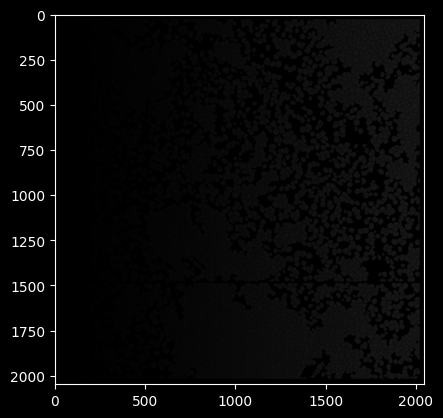

In [15]:
plt.imshow(p1)

In [242]:
balance_and_shuffle(v_data)

['/data/bionets/datasets/melc/melanoma/processed/validation/Nevi_15_201910021125_4',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Melanoma_35_202009031055_4',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Nevi_11_201904251621_2',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Nevi_15_201910021125_4',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Nevi_13_201905241311_3',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Nevi_11_201904251621_2',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Melanoma_38_202010141116_4',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Nevi_15_201910021125_1',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Melanoma_31_202007091415_3',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Melanoma_38_202010141116_1',
 '/data/bionets/datasets/melc/melanoma/processed/validation/Melanoma_31_202007091415_4',
 '/data/bionets/datasets/melc/melanoma/proces

In [225]:
def clip(image, thresh):
    return np.where(image > thresh, thresh, image)

In [17]:
p = "/data_nfs/datasets/melc/melanoma/processed/training"

In [ ]:
markers = ["Propidium", "phase", "CD95", "CD274", "Melan-A","Bcl-2"]

In [18]:
markers = ["ADAM10-PE", "CD63"]
markers = ["CD103", "HLA-DR", "CD3", "CD8", "CD31"]
means = {m: list() for m in markers}
stds = {m: list() for m in markers}

for channel in markers:   
    imgs = list()
    for sample in os.listdir(p):
        sample = os.path.join(p, sample)
        try:
            file = [m for m in os.listdir(sample) if channel in m and not os.path.isdir(os.path.join(sample, m))][0]
            img = cv2.imread(os.path.join(sample, file), cv2.IMREAD_GRAYSCALE)
            img = img.astype("float64") / 255.
            imgs.append(img)
        except:
            print(sample, "lacks", channel)
            continue
    imgs = np.array(imgs)
    means[channel] = np.mean(imgs)
    stds[channel] = np.std(imgs)

/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_01_201801261128_1 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_01_201801261128_2 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_01_201801261128_3 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_02_201802161126_1 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_02_201802161126_2 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_02_201802161126_3 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_02_201802161126_4 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_03_201803281110_1 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_03_201803281110_2 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_03_201803281110_3 lacks CD103
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_04_201804301352_1 lacks CD103

/home/rzlin/je30bery/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rzlin/je30bery/.local/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/rzlin/je30bery/.local/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/rzlin/je30bery/.local/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/rzlin/je30bery/.local/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/data_nfs/datasets/melc/melanoma/processed/training/Nevi_01_201712121140_1 lacks HLA-DR
/data_nfs/datasets/melc/melanoma/processed/training/Nevi_01_201712121140_2 lacks HLA-DR
/data_nfs/datasets/melc/melanoma/processed/training/Nevi_01_201712121140_1 lacks CD3
/data_nfs/datasets/melc/melanoma/processed/training/Nevi_01_201712121140_2 lacks CD3
/data_nfs/datasets/melc/melanoma/processed/training/Nevi_01_201712121140_1 lacks CD8
/data_nfs/datasets/melc/melanoma/processed/training/Nevi_01_201712121140_2 lacks CD8
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_01_201801261128_1 lacks CD31
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_01_201801261128_2 lacks CD31
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_01_201801261128_3 lacks CD31
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_02_201802161126_1 lacks CD31
/data_nfs/datasets/melc/melanoma/processed/training/Melanoma_02_201802161126_2 lacks CD31
/data_nfs/datasets/melc/melanoma/p

In [19]:
means

{'CD103': nan,
 'HLA-DR': 0.10238566351889483,
 'CD3': 0.07303562418427084,
 'CD8': 0.06087764743323087,
 'CD31': nan}

In [20]:
stds

{'CD103': nan,
 'HLA-DR': 0.13826473686677376,
 'CD3': 0.1299362741733283,
 'CD8': 0.11157233764201473,
 'CD31': nan}

In [5]:
colored = np.array((3 * [prop_iod]))
colored[0] = bcl2 / np.max(bcl2) * 255
colored[1] = melan_a / np.max(melan_a) * 255
colored[2] = cd274 / np.max(cd274) * 255

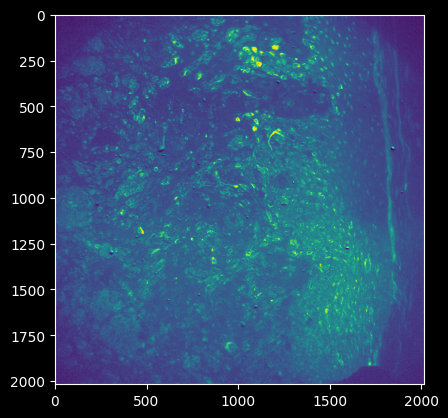

In [6]:
plt.imshow(bcl2)

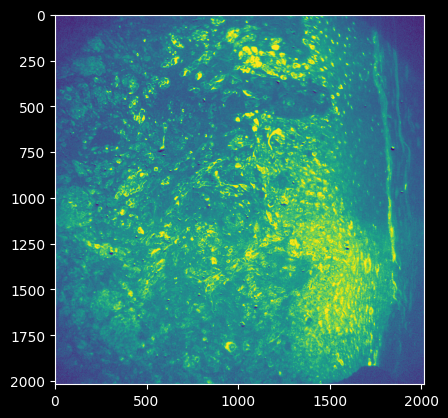

In [7]:
plt.imshow(clip(bcl2, 150))

In [8]:
from sklearn.utils import shuffle

In [200]:
from model.melanoma_data import MelanomaData

In [215]:
markers = ["Propidium", "phase", "CD95", "CD274", "Melan-A","Bcl-2"]

train_dl  = t.utils.data.DataLoader(MelanomaData(markers=markers), batch_size=1)
it = iter(train_dl)

In [216]:
res = next(it)

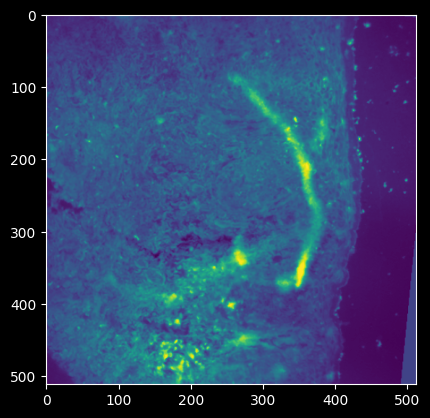

In [222]:
plt.imshow(res[0][0][4])